In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 20)

df = pd.read_csv('supermarket_sales.csv')

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Column Overview:
---
-   **Invoice ID:** Unique transaction identifier.
-   **Branch & City:** Store location.
-   **Customer Type:** Whether the customer is a member or a normal customer.
-   **Gender:** Demographic segmentation.
-   **Product Line:** Category of purchased products.
-   **Unit Price & Quantity:** Pricing and sales volume.
-   **Tax 5% & Total:** Financial metrics.
-   **Date & Time:** Temporal patterns in sales.
-   **Payment:** Payment method used.
-   **COGS, Gross Margin, Gross Income:** Profitability insights.
-   **Rating:** Customer satisfaction metric.

# Check for NULL Values and Errors in the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year
df['Day of Week'] = df['Date'].dt.dayofweek

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [5]:
df.drop(['Date', 'Time', 'Day', 'Year', 'Day of Week', 'Hour', 'Minute'], axis=1).describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,3.000000


## Sales Volume & Revenue

In [6]:
print("Total Sales:", df['Total'].sum())
print("Average Gross Income:", df['gross income'].mean())

Total Sales: 322966.749
Average Gross Income: 15.379368999999999


In [7]:
# Average Gross Income by Day of Week
print(df.groupby('Day of Week')['gross income'].mean().reset_index().rename(columns={'gross income': 'Average Gross Income'}))

   Day of Week  Average Gross Income
0            0             14.437744
1            1             15.516047
2            2             14.562483
3            3             15.648464
4            4             15.048421
5            5             16.295241
6            6             15.917613


- Citywise Sales & Revenue

                 Total  Quantity  gross income
City                                          
Mandalay   106197.6720      1820     5057.0320
Naypyitaw  110568.7065      1831     5265.1765
Yangon     106200.3705      1859     5057.1605


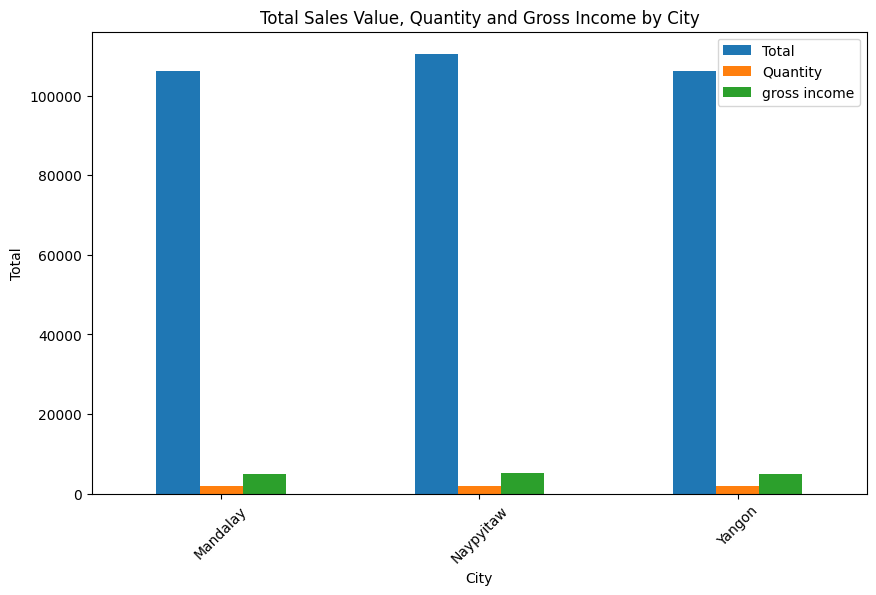

In [8]:
sales_city_branch = df.groupby(['City'])[['Total', 'Quantity', 'gross income']].sum()
print(sales_city_branch)

import matplotlib.pyplot as plt

sales_city_branch.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales Value, Quantity and Gross Income by City')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

# Analyze Customer Behavior

- Normal V/s Member

                    Total  Quantity  gross income
Customer type                                    
Member         164223.444      2785      7820.164
Normal         158743.305      2725      7559.205


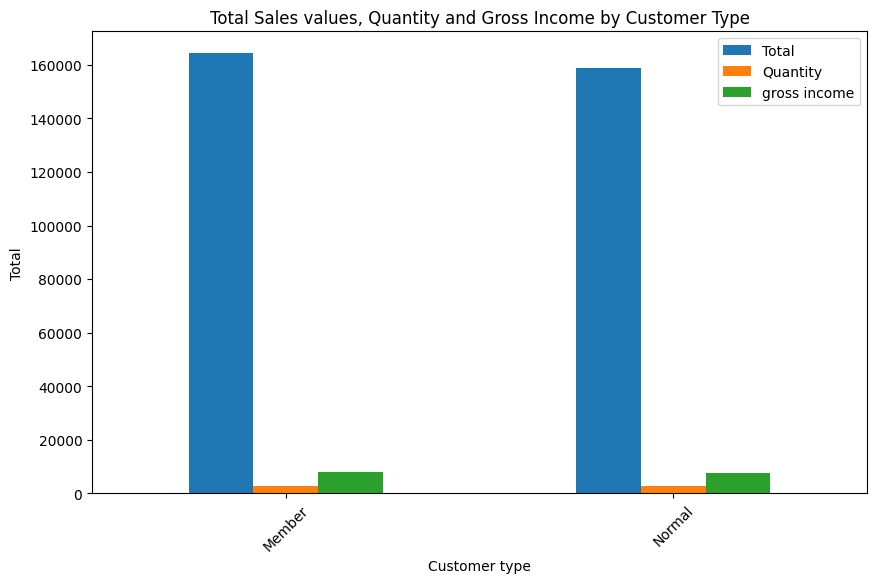

In [9]:
# Normal vs Member

Customer_type = df.groupby('Customer type')[['Total', 'Quantity', 'gross income']].sum()
print(Customer_type)

Customer_type.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales values, Quantity and Gross Income by Customer Type')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

- Female vs Male

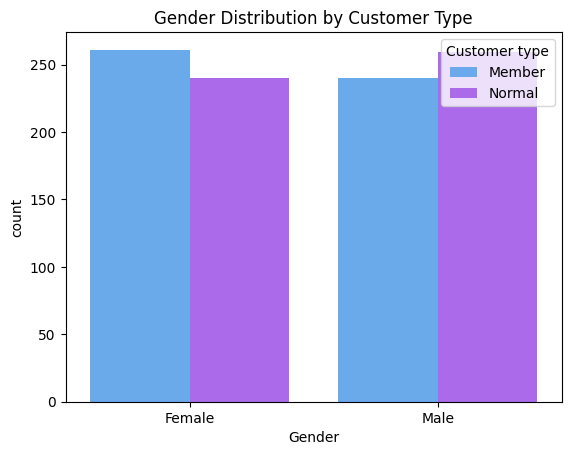

In [10]:
import seaborn as sns
sns.countplot(x='Gender', hue='Customer type', data=df, palette='cool')
plt.title('Gender Distribution by Customer Type')
plt.show()

             Total  Quantity  gross income
Gender                                    
Female  167882.925      2869      7994.425
Male    155083.824      2641      7384.944


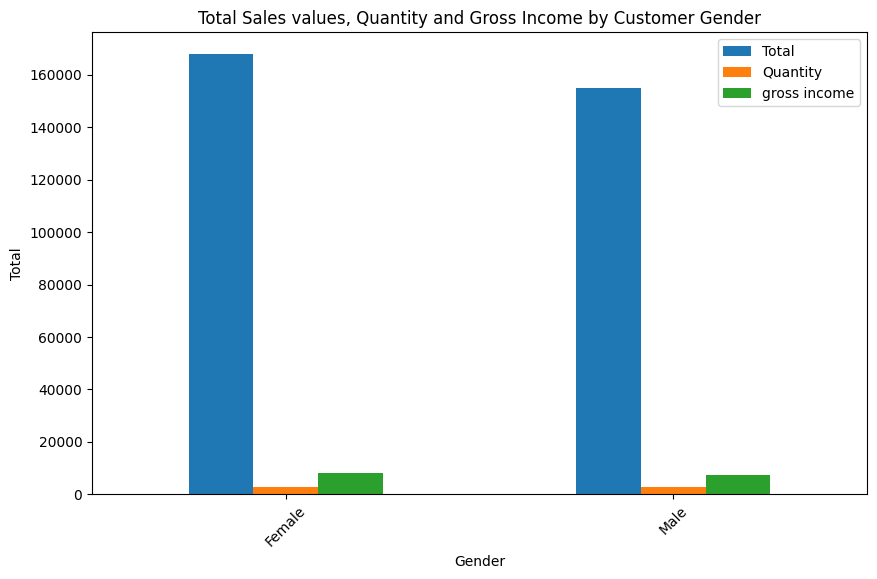

In [11]:
Customer_type = df.groupby('Gender')[['Total', 'Quantity', 'gross income']].sum()
print(Customer_type)

Customer_type.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales values, Quantity and Gross Income by Customer Gender')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

## Ratings Trend

- Citywise Ratings Trends

In [12]:
avg_ratings = df.groupby(['City', 'Branch'])['Rating'].mean()
print(avg_ratings)

City       Branch
Mandalay   B         6.818072
Naypyitaw  C         7.072866
Yangon     A         7.027059
Name: Rating, dtype: float64


- Customer Type Ratings Trends

In [13]:
avg_ratings_by_cust_typ = df.groupby(['Customer type'])['Rating'].mean()
print(avg_ratings_by_cust_typ)

Customer type
Member    6.940319
Normal    7.005210
Name: Rating, dtype: float64


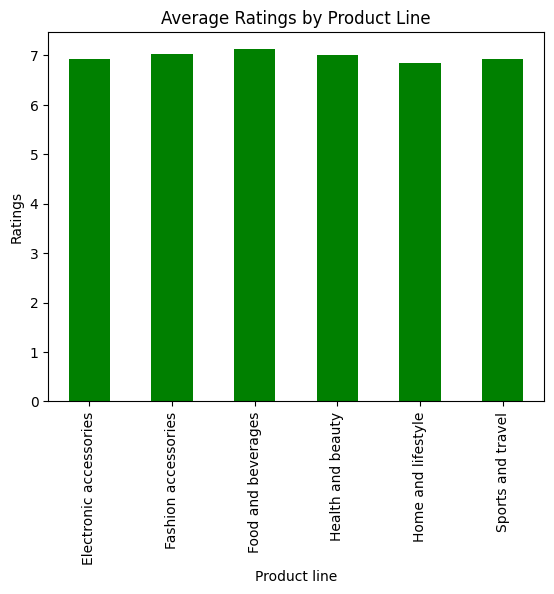

In [14]:
ratings_product = df.groupby('Product line')['Rating'].mean()
ratings_product.plot(kind='bar', color='green', title='Average Ratings by Product Line')
plt.ylabel('Ratings')
plt.show()

# Analyzing different kinds of Product line 

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


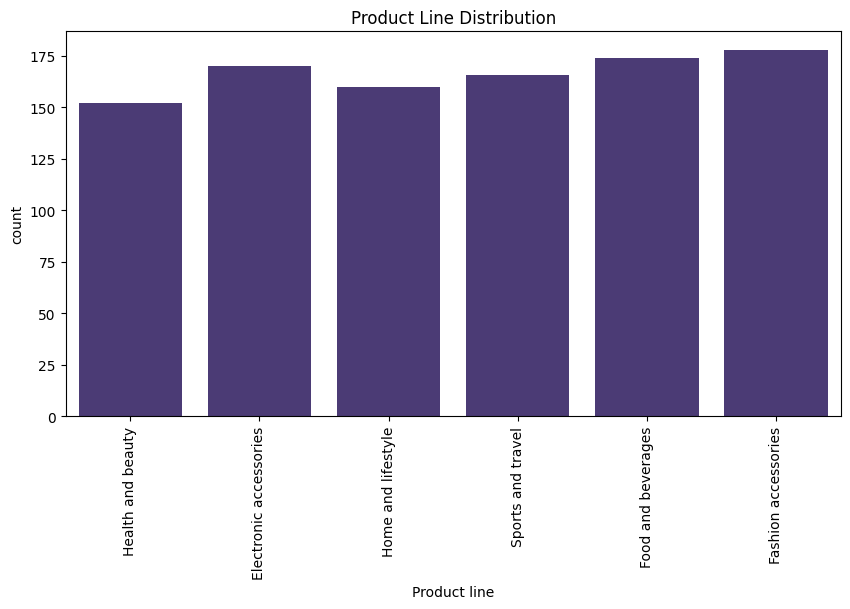

In [15]:
import seaborn as sns

df_best_product = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print(df_best_product)

plt.figure(figsize=(10, 5))
sns.set_palette('viridis')
sns.countplot(x='Product line', data=df)
plt.xticks(rotation=90)
plt.title('Product Line Distribution')
plt.show()

- Sales performance of product line

                             Total  Quantity  gross income
Product line                                              
Electronic accessories  54337.5315       971     2587.5015
Fashion accessories     54305.8950       902     2585.9950
Food and beverages      56144.8440       952     2673.5640
Health and beauty       49193.7390       854     2342.5590
Home and lifestyle      53861.9130       911     2564.8530
Sports and travel       55122.8265       920     2624.8965


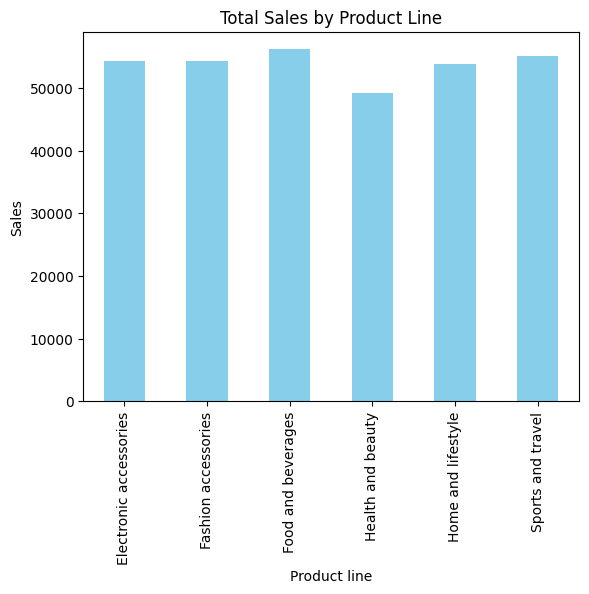

In [16]:
product_sales = df.groupby('Product line')[['Total', 'Quantity', 'gross income']].sum()
print(product_sales)

product_sales['Total'].plot(kind='bar', title='Total Sales by Product Line', color='skyblue')
plt.ylabel('Sales')
plt.show()

- Product line performance by Day

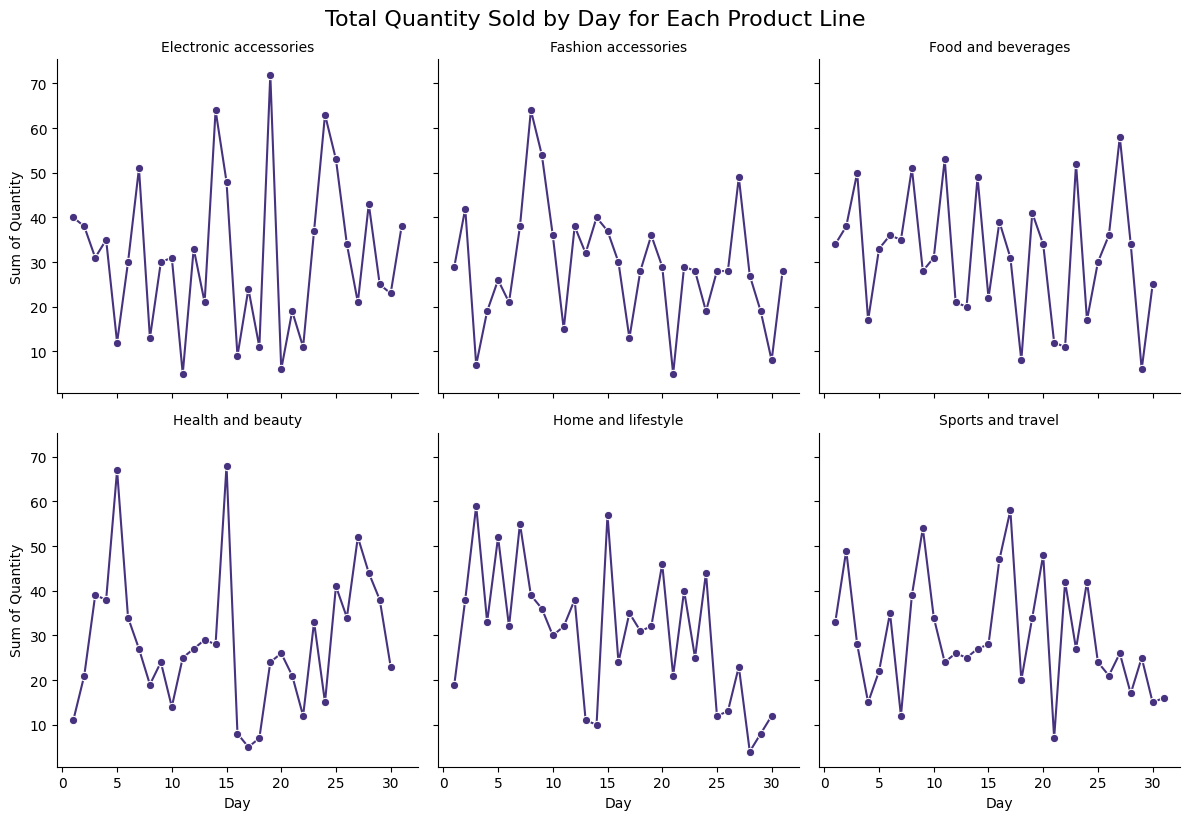

In [17]:
df_grouped = df.groupby(['Day', 'Product line'])[['Quantity']].sum().reset_index()
# Create the FacetGrid
g = sns.FacetGrid(df_grouped, col="Product line", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.lineplot, "Day", "Quantity", marker="o")

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Day", "Sum of Quantity")
g.fig.suptitle("Total Quantity Sold by Day for Each Product Line", y=1.02, fontsize=16)
plt.show()

- Product line performance by Day of Week

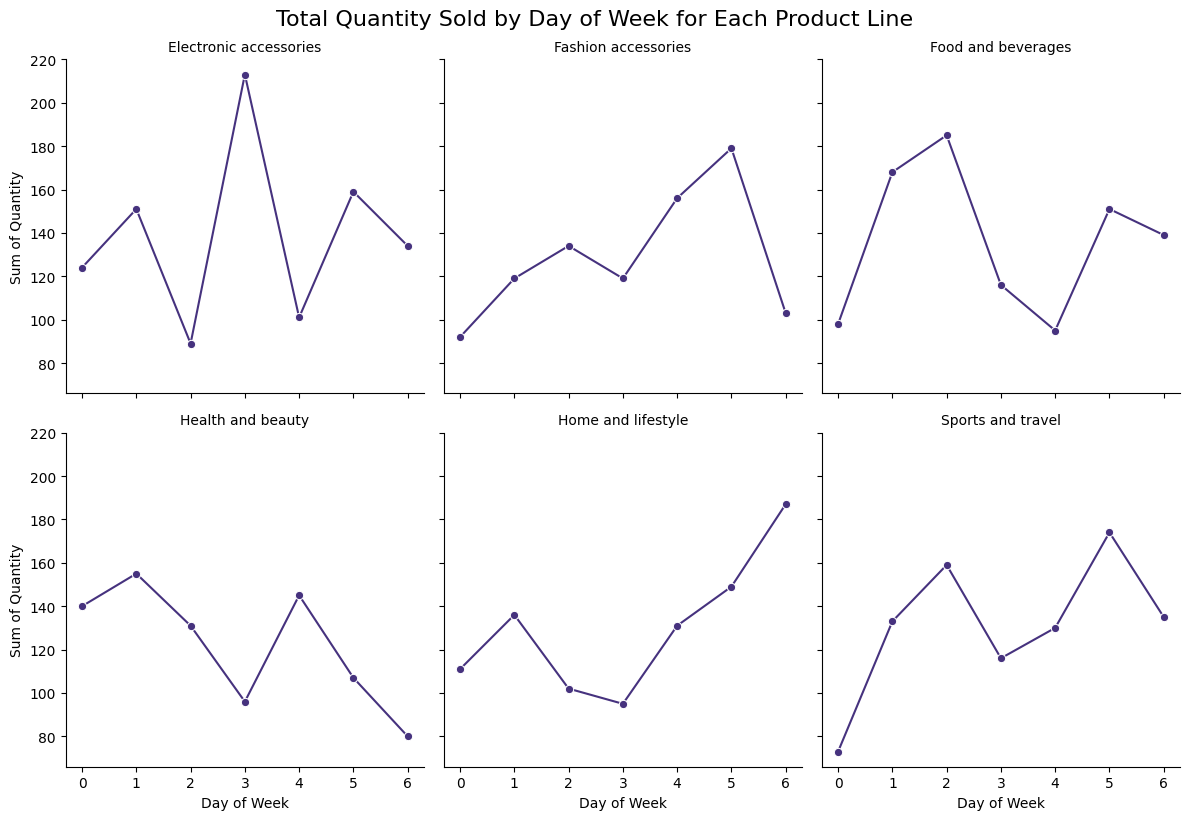

In [18]:
df_grouped = df.groupby(['Day of Week', 'Product line'])[['Quantity']].sum().reset_index()
# Create the FacetGrid
g = sns.FacetGrid(df_grouped, col="Product line", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.lineplot, "Day of Week", "Quantity", marker="o")

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Day of Week", "Sum of Quantity")
g.fig.suptitle("Total Quantity Sold by Day of Week for Each Product Line", y=1.02, fontsize=16)
plt.show()

- Product line performance by Hours

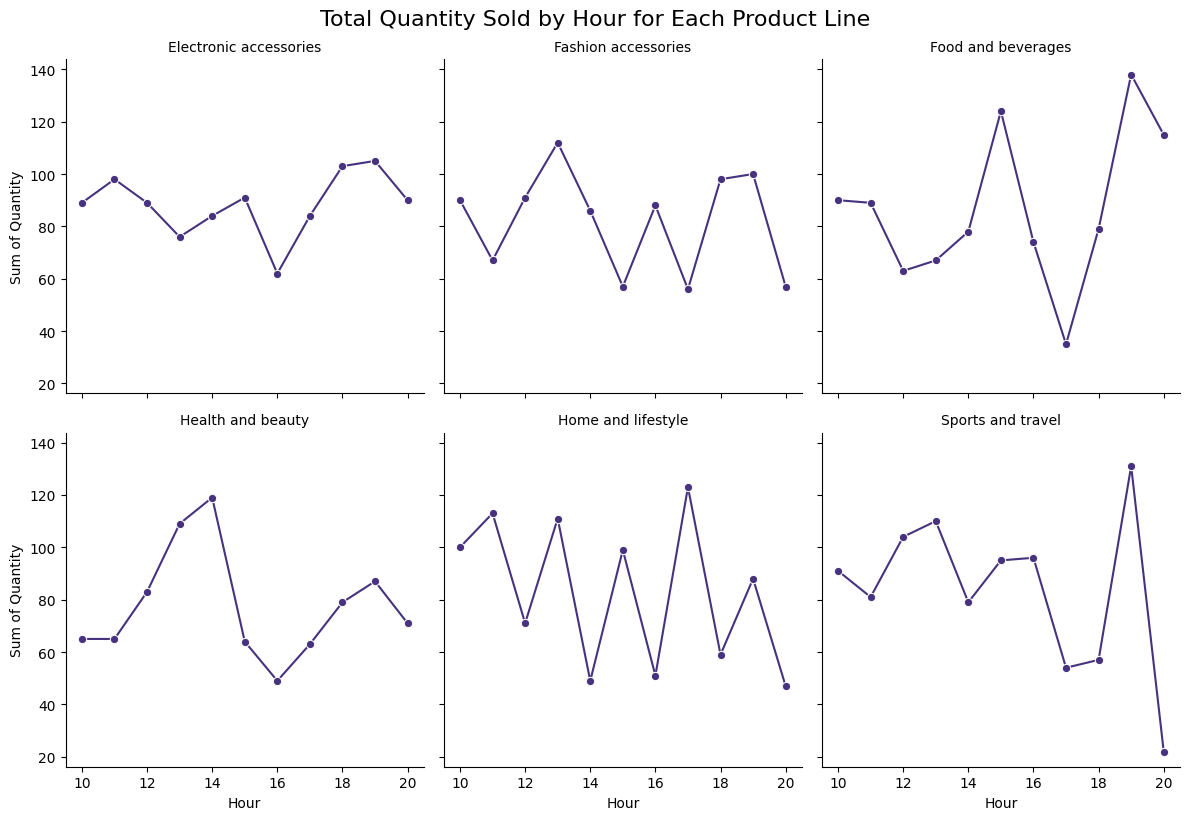

In [19]:
df_grouped = df.groupby(['Hour', 'Product line'])[['Quantity']].sum().reset_index()
# Create the FacetGrid
g = sns.FacetGrid(df_grouped, col="Product line", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.lineplot, "Hour", "Quantity", marker="o")

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Hour", "Sum of Quantity")
g.fig.suptitle("Total Quantity Sold by Hour for Each Product Line", y=1.02, fontsize=16)
plt.show()

# Temporal Analysis

- Sales Trend

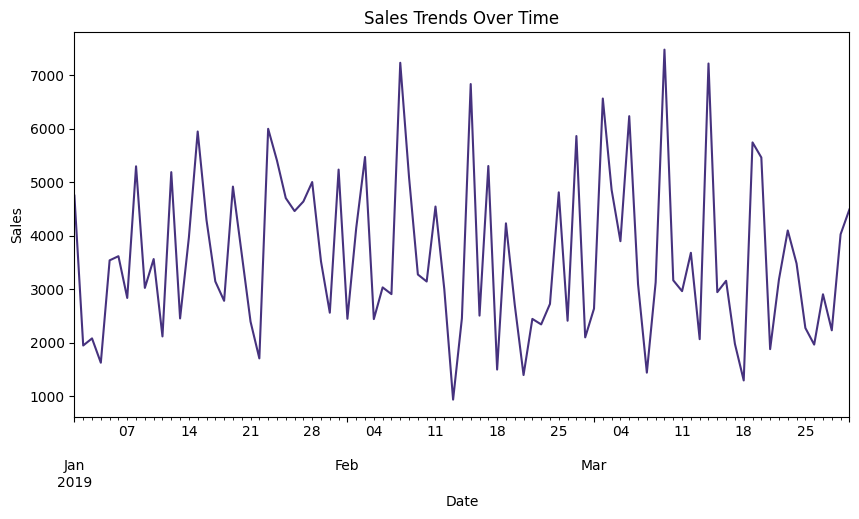

In [20]:
sales_trend = df.groupby('Date')['Total'].sum()
sales_trend.plot(title='Sales Trends Over Time', figsize=(10, 5))
plt.ylabel('Sales')
plt.show()

- Hourly Sales Patterns

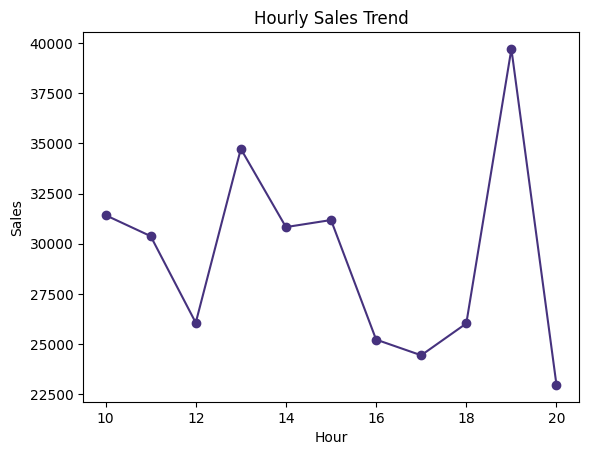

In [21]:
hourly_sales = df.groupby('Hour')['Total'].sum()
hourly_sales.plot(kind='line', title='Hourly Sales Trend', marker='o')
plt.ylabel('Sales')
plt.show()

# Payment Types

In [22]:
payment_counts = df['Payment'].value_counts()
print(payment_counts)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


In [23]:
payment_sales = df.groupby('Payment')['Total'].agg(['sum', 'mean'])
print(payment_sales)

                    sum        mean
Payment                            
Cash         112206.570  326.181890
Credit card  100767.072  324.009878
Ewallet      109993.107  318.820600


In [24]:
payment_profit = df.groupby('Payment')[['gross income', 'gross margin percentage']].mean()
print(payment_profit)

             gross income  gross margin percentage
Payment                                           
Cash            15.532471                 4.761905
Credit card     15.429042                 4.761905
Ewallet         15.181933                 4.761905


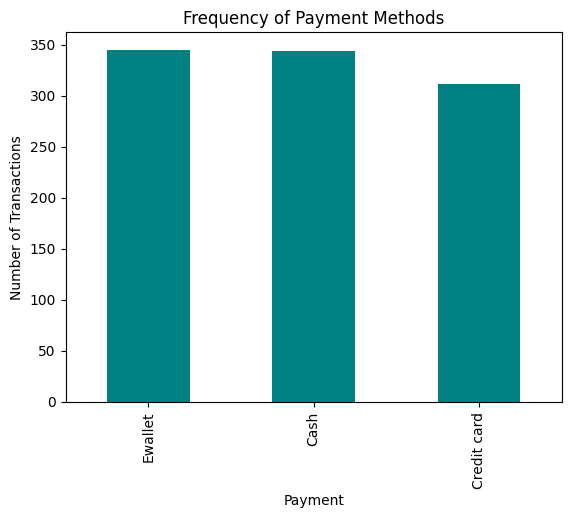

In [25]:
payment_counts.plot(kind='bar', color='teal', title='Frequency of Payment Methods')
plt.ylabel('Number of Transactions')
plt.show()

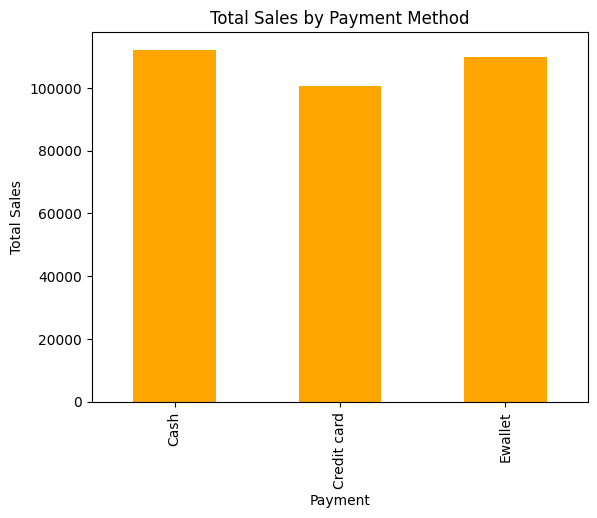

In [26]:
payment_sales['sum'].plot(kind='bar', color='orange', title='Total Sales by Payment Method')
plt.ylabel('Total Sales')
plt.show()

- Customer Behavior by Payment Method:

Gender                         Female        Male
Payment     Customer type                        
Cash        Member         332.381467  317.265173
            Normal         336.362250  317.564506
Credit card Member         344.482833  326.439238
            Normal         308.150548  310.615295
Ewallet     Member         336.162426  307.022494
            Normal         349.887513  291.057500


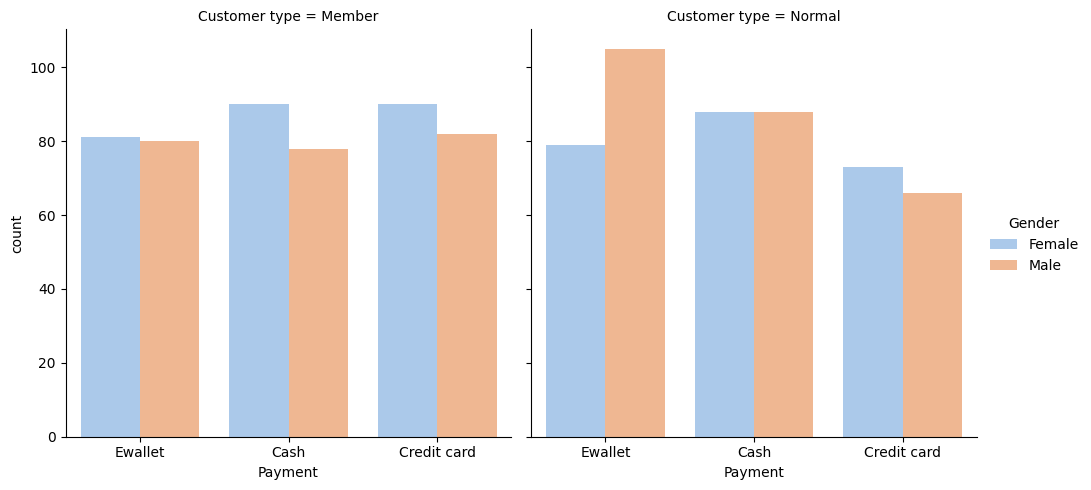

In [27]:
payment_behavior = df.groupby(['Payment', 'Customer type', 'Gender'])['Total'].mean().unstack()
print(payment_behavior)

sns.catplot(x='Payment', hue='Gender', col='Customer type', data=df, kind='count', palette='pastel')
plt.show()

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Payment                                                                         
Cash                      291.971577           309.013895          337.032868   
Credit card               335.391685           309.554813          331.724434   
Ewallet                   343.010038           297.800515          298.192500   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Payment                                                                 
Cash                 350.798143          364.490206         319.895136  
Credit card          319.389420          310.734900         336.155717  
Ewallet              302.550170          332.653781         341.347417  


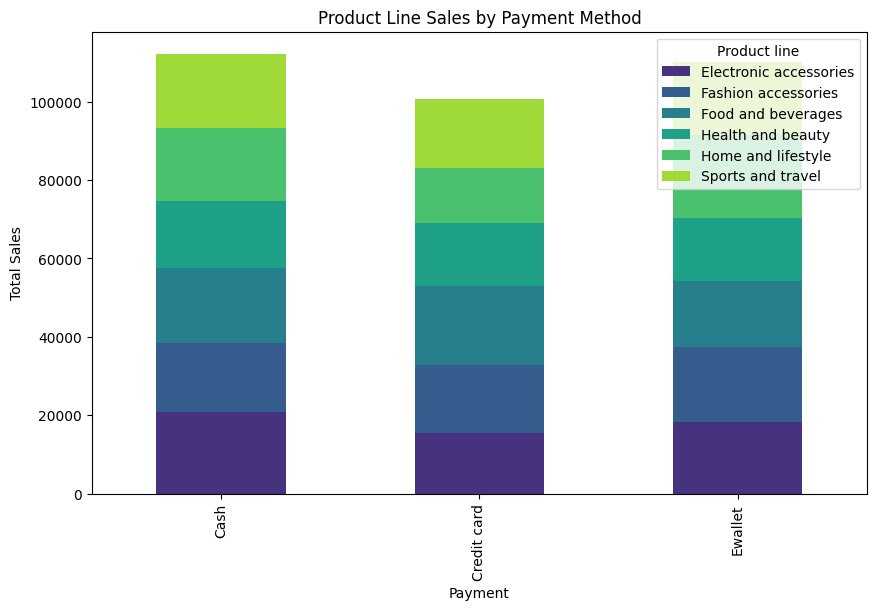

In [28]:
print(df.groupby(['Payment', 'Product line'])['Total'].mean().unstack())
payment_product = df.groupby(['Payment', 'Product line'])['Total'].sum().unstack()
payment_product.plot(kind='bar', stacked=True, figsize=(10, 6), title='Product Line Sales by Payment Method')
plt.ylabel('Total Sales')
plt.show()